<br>


# Introdução ao Aprendizado por Reforço (Reinforcement Learning)

## Algoritmo Q-learning

O algoritmo __Q-Learning__ é um dos mais fundamentais e conhecidos algoritmos nesse contexto de aprendizado por reforço. 
Iremos estudar no detalhe esse algoritmo e implementá-lo do zero. Iremos também nos basear num _problema prático_, o que aumentará o entendimento no tema!

<br>

__Exemplo prático:__
O exemplo que trabalharemos descreve um agente que usa aprendizado não supervisionado (Q-learning) para aprender a respeito de um ambiente desconhecido.


Suponha que estamos numa casa com 5 cômodos conectados por portas, como mostrado na figura abaixo. Vamos enumerar cada cômodo de 0 até 4. O "cômodo" 5 representa _o lado de fora da casa_.

Nosso agente começará num cômodo qualquer da casa e o objetivo é que ele aprenda a sair da casa da forma mais eficiente possível, ou seja, passando pela menor quantidade de cômodos!


Planta da casa com a indicação dos cômodos:

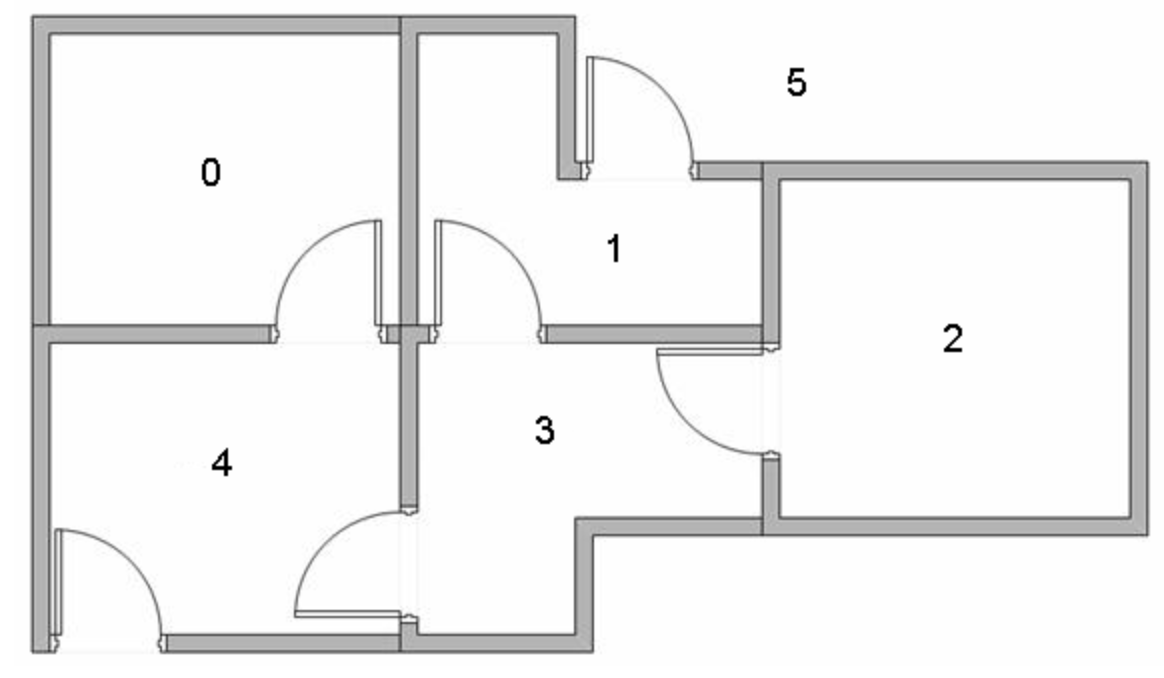

<br>

Podemos representar a planta da casa como um __grafo__, em que cada nó (ou estado - state) representa um cômodo e as arestas representam as possíveis movimentações dentro da casa.

Por exemplo, do cômodo 2, podemos ir apenas para o cômodo 3. Já no cômodo 4, podemos ir para 0, 3 ou 5.

O nó (state) 5 representa nosso __goal state__, ou seja, é o nosso objetivo!

<br>

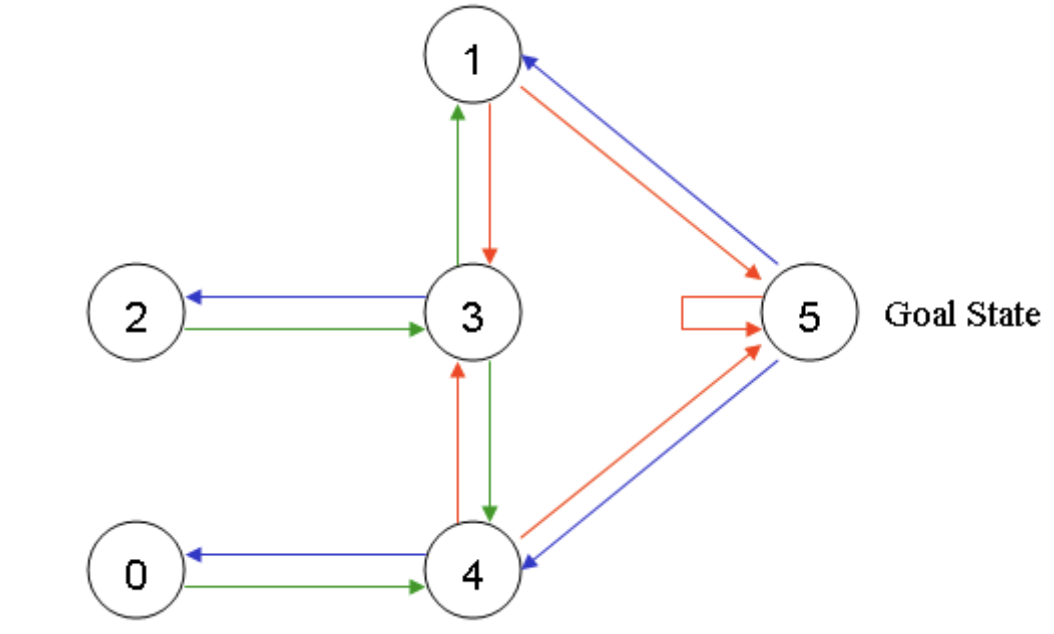

<br>

Como já foi comentado, o objetivo é colocar um agente num cômodo qualquer e que esse agente seja capaz de conseguir sair de casa de forma otimizada.

Como o agente, no início, não conhece o ambiente, ele irá explorar: irá percorrer de forma aleatória o ambiente para aprender. 

Iremos __premiar o agente de acordo com quais ações ele tomar.__ Por exemplo, se o agente está no cômodo 1 e ele decide ir para o cômodo 5, iremos dar uma recompensa positiva, pois ele fez um movimento correto. Caso ele opte em ir do cômodo 1 para o 3, a recompensa não será positiva, pois a ação não foi a melhor. 

Para isso, precisamos __definir quais são as recompensas.__ Faremos isso de forma numérica, veja a figura abaixo:

<br>

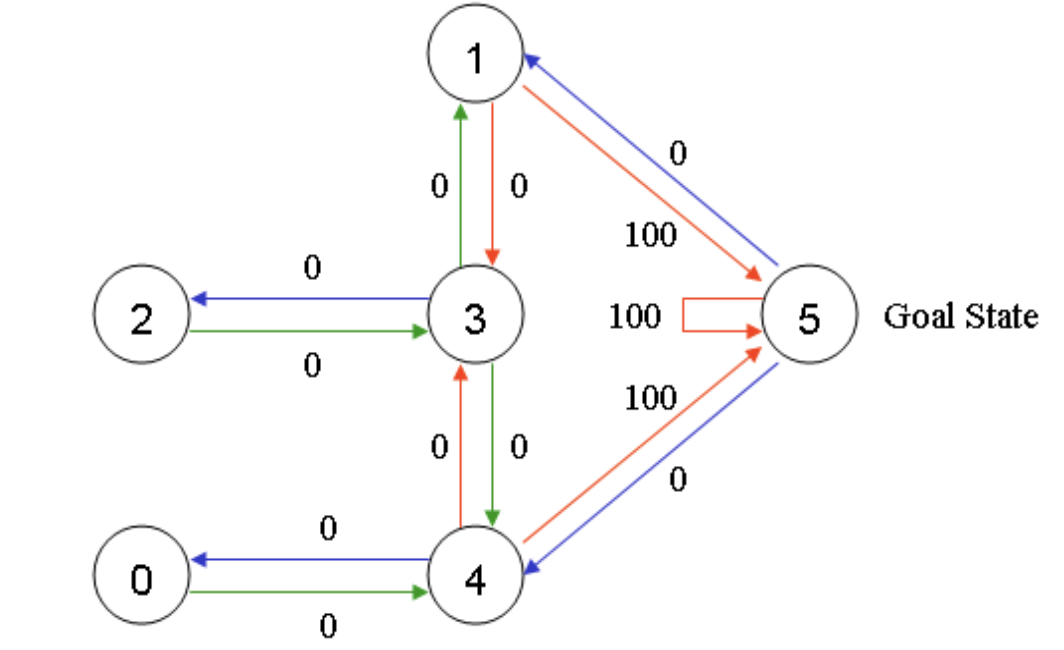

<br>

Aqui, a recompensa é clara: se a ação tomada nos encaminhar para o nosso objetivo (goal state = cômodo 5), então atribuimos um valor 100. Caso contrário, atribuimos um valor 0. 

Ainda, o cômodo 5 tem um loop nele mesmo com recompensa de 100 pontos, indicando que, ao chegarmos no cômodo 5, queremos permanecer neste cômodo!

__No Q-Learning, o objetivo do algoritmo é aprender a se deslocar para estados (states) com as maiores recompensas.__

<br><br>


Agora, de forma prática, imagine que o nosso agente está no cômodo 2 e é solicitado para evacuar a casa, ou seja, o agente precisa ir para o cômodo 5:

<br>

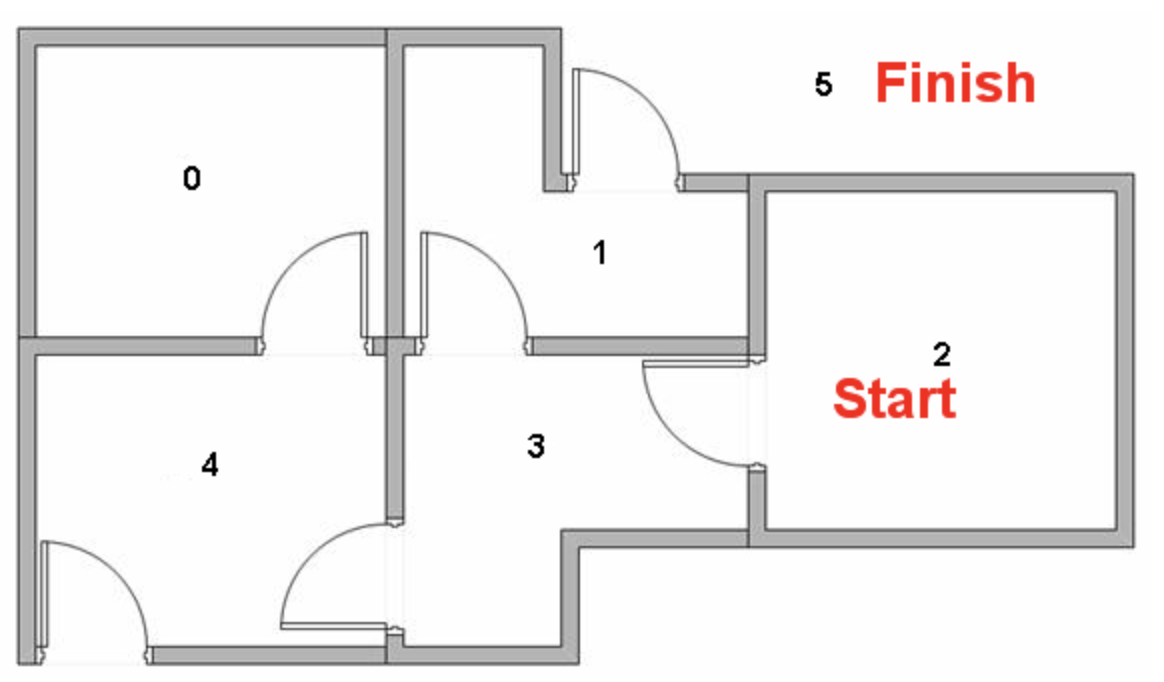

Como a __terminologia__ do __Q-Learning__ envolve os termos __estado__ e __ação__, vamos utilizá-los sempre a partir de agora.

Reforçando, cada cômodo da casa é um estado; o estado 5 é o estado objetivo, que significa sair da casa.

Além disso, o movimento do agente de ir de um cômodo para outro é o que chamamos de ação.

Por exemplo, na prática, o agente tomar a ação de ir do estado 1 para o estado 3 significa que o agente se movimentou do cômodo 1 para o cômodo 3. 



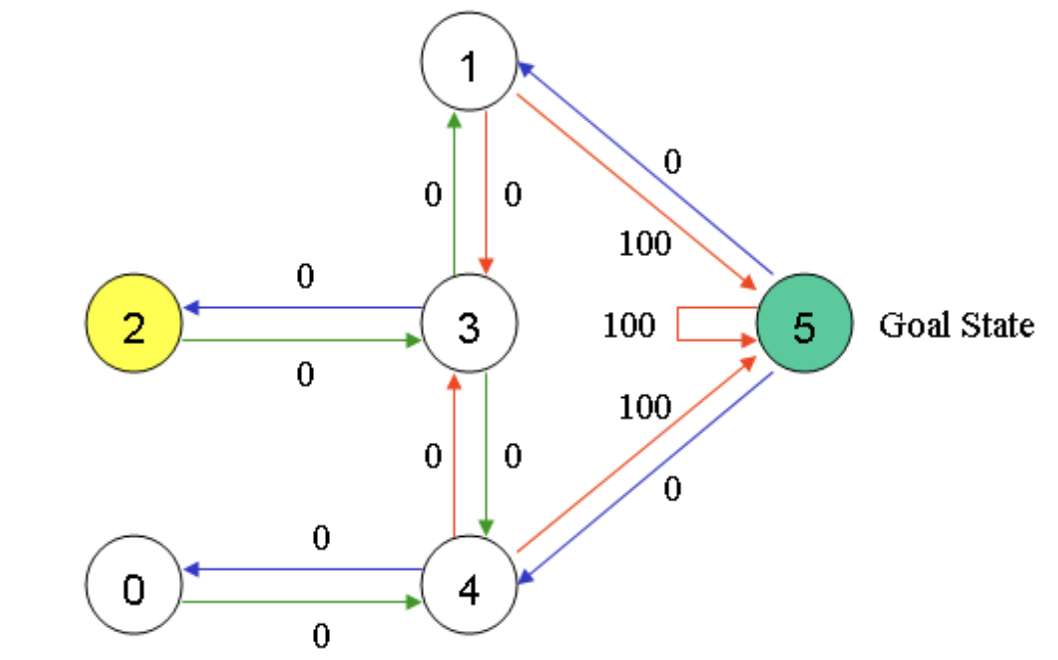

<br>

Acima, temos o agente começando no estado 2. Neste caso, a única ação que ele pode tomar é ir para o estado 3.
Chegando no estado 3, ele pode tomar várias ações: voltar para 2, ir para 1 ou para 4. Caso ele vá para 1 ou 4, ele pode ter a chance de chegar no estado 5. 

<br><br>

Podemos __representar o grafo de estados/ações/recompensas__ de uma __forma matricial!__ Essa representação será fundamental para nossa implementação do Q-Learning.

Abaixo, temos a foto da matriz __R__: a matriz de recompensas ou reward matrix.

<br>

### Reward matrix:

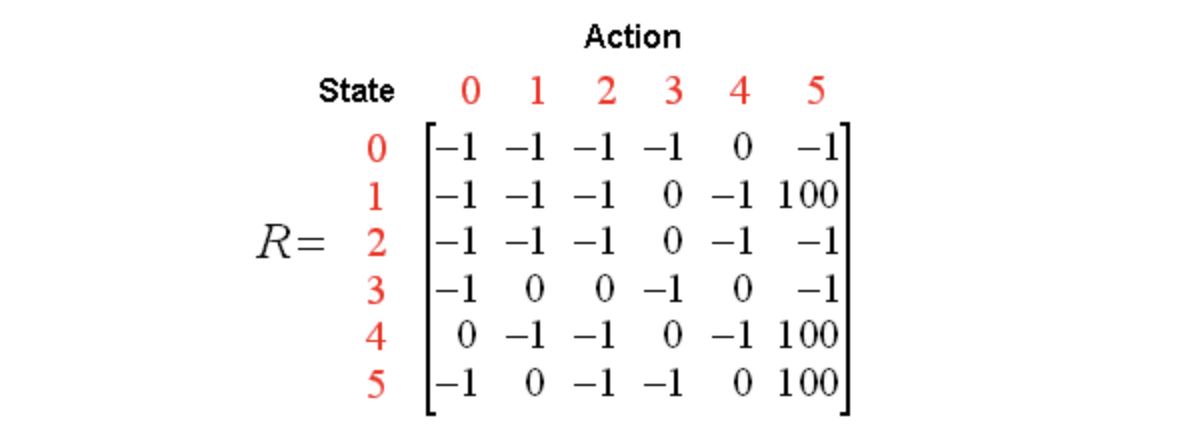

<br>

Cada entrada da matriz registra o valor da recompensa em ir de um estado para outro (ou seja, qual a recompensa atrelada a ação). Além disso, o valor -1 indica que uma ação não é possível de ser tomada. 

Por exemplo, não é possível ir do estado 0 para o estado 2, então representamos essa impossibilidade colocando -1 na entrada atrelada a esse par na matriz.

<br>

Além da matriz de recompensas __R__ apresentada acima, outra matriz muito importante nesse contexto é a __matriz Q__.

De fato, essa matriz pode ser interpretada como o __cérebro do agente__, representando a memória do que o agente aprendeu do ambiente desde que ele começou a exploração. E claro, o __Q__ do Q-Learning é justamente fazendo menção a essa matriz! :)

<br>


__O Algoritmo Q-learning funciona com a seguinte lógica:__

Como o agente começa o aprendizado sem nenhum conhecimento, a matriz será inicializada totalmente zerada. 

Iremos representar a matriz Q com os mesmos formatos da matriz R, dado que sabemos - neste caso - quais são os estados possíveis para o agente se movimentar. 

A medida que o agente vai andando pelo ambiente, isto é, tomando ações, vamos __atualizando a matriz Q__, representando o aprendizado do agente a respeito do ambiente.

__A regra de atualização da matriz é expressa pela fórmula:__

Suponha que o agente está no estado S e toma a ação A, indo para o estado $S_{post}$ (estado posterior).

representação:
##  S  $\xrightarrow{\text{ação A}}$  $S_{post}$  

<br>

iremos atualizar a matriz Q com a regra:

#### Q(S, A) = R(S, A) + $\gamma$ * Max[ Q($S_{post}$, todas ações possíveis) ]

<br>

De acordo com a fórmula acima, a atualização da entrada (S,A) da matriz Q será pela soma da recompensa atrelada a tomar a ação A a partir do estado S (que podemos descobrir consultando diretamente a matriz R) com a multiplicação entre $\gamma$ (um fator de correção, a ser explicado na sequência) e o valor máximo de Q para todas as ações possíveis no próximo estado, $S_{post}$.

<br>

O agente irá aprender pela experiência das tomadas de ações e fará isso de forma não supervisionada. 

Ele irá explorar o ambiente a partir de um primeiro estado até atingir o estado objetivo. Quando ele atingir o objetivo, teremos concluído um __episódio__ de aprendizado. 

Em tempos de treinamento, o agente sempre começa um estado aleatório e explora o ambiente até atingir o estado objetivo, isto é, até completar um episódio. Quando um episódio é completado, outro é iniciado de forma semelhante. 

A medida que mais episódios são completados, mais o agente aprende sobre o ambiente, visto que a matriz Q vai "evoluindo" a medida que os episódios são finalizados.

<br><br>

__O algoritmo pode ser expresso como segue:__

1) Defina o parâmetro $\gamma$ e a matriz de recompensa R a partir dos estados e ações possíveis a ser tomadas;

2) Inicialize a matriz Q com zeros;

3) (Loop nos episódios) Para cada episódio:

    3.1) selecione um estado inicial de forma aleatória;
    
    3.2) enquanto o estado objetivo não é alcançado:
    
            3.2.1) selecione uma dentre todas as possíveis ações a partir do estado selecionado
            
            3.2.2) com a ação selecionada (o que já indica qual é o próximo estado), calcule
            
Q(S, A) = R(S, A) + $\gamma$ * Max[ Q($S_{post}$, todas ações possíveis) ]
                   
            3.2.3) defina o novo estado inicial como sendo o estado resultante da ação tomada
            
    3.3) Finalize o episódio quando o agente atingir o estado objetivo. 

4) A matriz Q, atualizada após o loop nos episódios, é utilizada para o agente tomar as decisões.

<br><br>

__Comentários finais:__

O algoritmo acima (Q-Learning) é usado para o agente aprender pela experiência de exploração. Cada episódio finalizado é equivalente a uma seção de treinamento. Nessas seções, o agente explora o ambiente e recebe recompensas (positivas ou não) de acordo com as ações tomadas, até atingir o estado objetivo. 

O objetivo do treinamento é refinar o 'cérebro' do agente, isto é, refinar a matriz Q. Uma vez que o agente seja bastante treinado - ou seja, tendo completado muitos episódios - em vez do agente ficar "rodando" pela casa, indo de comôdo em cômodo de forma aleatória, ele vai conseguir achar o caminho da saída da forma mais otimizada!

Além disso, o __parâmetro $\gamma$__, varia entre 0 e 1. Se $\gamma$ for próximo de 0, o agente irá tender a tomar ações baseadas em resultados imediatos. Caso $\gamma$ seja próximo de 1, o agente tende a considerar recompensas futuras com mais peso. É um hiper-parâmetro do algoritmo e, como todas as escolhas em Machine Learning, precisa ser muito bem testada de acordo com o problema em questão.

Finalmente, __uma vez que o treinamento tenha sido concluído,__ o agente tomará as decisões diretamente da matriz Q.

Partindo de um estado inicial, o agente irá tomar a ação com o maior valor de Q e irá para o próximo estado. Ele fará isso repetidamente até atingir o estado objetivo, no qual permancerá.


<br><br>

Vamos abaixo começar a discutir e exemplificar esses pontos todos em Python!

<br>

In [1]:
#importando os módulos básicos
import pandas as pd
import numpy as np

In [2]:
#definindo quais são os estados e ações que podemos tomar
states = [0,1,2,3,4,5]
actions = [0,1,2,3,4,5]

#definido o parâmetro gamma e o estado objetivo
gamma = 0.8
goal_state = 5

In [3]:
#definindo a matriz de recompensa
R = [[-1,-1,-1,-1,0,-1], 
     [-1,-1,-1,0,-1,100],
     [-1,-1,-1,0,-1,-1],
     [-1,0,0,-1,0,-1],
     [0,-1,-1,0,-1,100],
     [-1,0,-1,-1,0,100]]

R = np.array(R)
print("reward matrix: matriz de recompensas\n")
print(pd.DataFrame(R,index=['state_'+str(i) for i in range(R.shape[0])],
                     columns=['state_'+str(i) for i in range(R.shape[0])],))

reward matrix: matriz de recompensas

         state_0  state_1  state_2  state_3  state_4  state_5
state_0       -1       -1       -1       -1        0       -1
state_1       -1       -1       -1        0       -1      100
state_2       -1       -1       -1        0       -1       -1
state_3       -1        0        0       -1        0       -1
state_4        0       -1       -1        0       -1      100
state_5       -1        0       -1       -1        0      100


In [4]:
#inicializando a matriz Q - totalmente zerada
Q = np.zeros(len(states) * len(actions)).reshape(len(states), len(actions))
print("Q-matrix: cérebro do agente, inicializado sem nenhum conhecimento do ambiente\n")
print(pd.DataFrame(Q,index=['state_'+str(i) for i in range(R.shape[0])],
                     columns=['state_'+str(i) for i in range(R.shape[0])],))

Q-matrix: cérebro do agente, inicializado sem nenhum conhecimento do ambiente

         state_0  state_1  state_2  state_3  state_4  state_5
state_0      0.0      0.0      0.0      0.0      0.0      0.0
state_1      0.0      0.0      0.0      0.0      0.0      0.0
state_2      0.0      0.0      0.0      0.0      0.0      0.0
state_3      0.0      0.0      0.0      0.0      0.0      0.0
state_4      0.0      0.0      0.0      0.0      0.0      0.0
state_5      0.0      0.0      0.0      0.0      0.0      0.0


In [5]:
#função auxiliar: a partir da matriz R, a função retorna quais são os possíveis estado a partir de um estado fixado
def get_possible_next_states(R, state):
    possible_next_states = np.argwhere(R[state, :]>=0).reshape(-1,)
    return possible_next_states

In [6]:
#exemplos
get_possible_next_states(R, state = 0)

array([4])

In [7]:
#exemplos
get_possible_next_states(R, state = 3)

array([1, 2, 4])

<br><br>

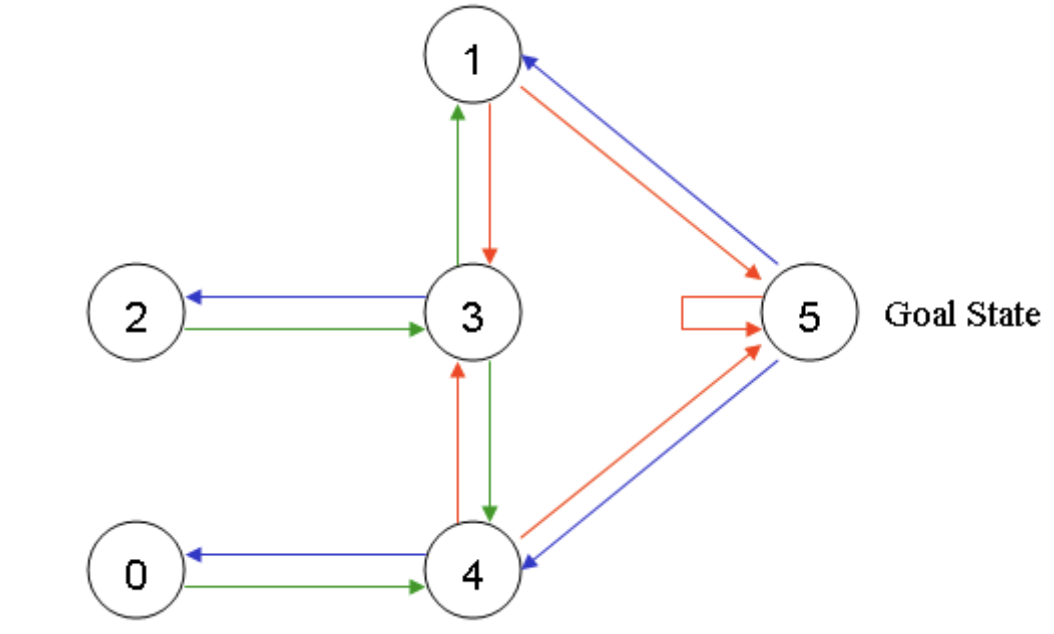

<br><br>

In [8]:
#### código para construir um episódio ####

#começamos escolhendo um estado de forma aleatórioa
state = np.random.choice(states, size = 1)[0]

#loop while até atingirmos o estado objetivo
next_state = None
while next_state != goal_state:
    
    #selecionamos os próximos estados, a partir do estado inicial
    possible_next_states = get_possible_next_states(R, state)
    
    #definimos o próximo estado, ou seja, estamos caracterizando qual ação foi tomada
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    
    #em cima da ação tomada, atualizamos a matriz Q
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    #atribuimos o estado inicial ao novo estado
    state = next_state
    print()
    
print('fim do episódio')
print()
print('Q-matrix atualizada:')
print(Q)

state --> next state: 3 4

state --> next state: 4 3

state --> next state: 3 4

state --> next state: 4 5

fim do episódio

Q-matrix atualizada:
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]


In [9]:
#vamos rodar um segundo episódio, para avaliarmos a evolução da matriz Q

state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:
    
    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()
    
print('fim do episódio')
print()
print('Q-matrix atualizada:')
print(Q)

state --> next state: 0 4

state --> next state: 4 3

state --> next state: 3 4

state --> next state: 4 5

fim do episódio

Q-matrix atualizada:
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]


In [10]:
#terceiro episódio

state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:
    
    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()
    
print('fim do episódio')
print()
print('Q-matrix atualizada:')
print(Q)

state --> next state: 4 0

state --> next state: 0 4

state --> next state: 4 3

state --> next state: 3 4

state --> next state: 4 5

fim do episódio

Q-matrix atualizada:
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]


In [11]:
#quarto episódio...

state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:
    
    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()
    
print('fim do episódio')
print()
print('Q-matrix atualizada:')
print(Q)

state --> next state: 0 4

state --> next state: 4 5

fim do episódio

Q-matrix atualizada:
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]


In [12]:
#quinto episódio....

state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:
    
    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()
    
print('fim do episódio')
print()
print('Q-matrix atualizada:')
print(Q)

state --> next state: 5 1

state --> next state: 1 3

state --> next state: 3 1

state --> next state: 1 5

fim do episódio

Q-matrix atualizada:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]
 [  0.   51.2   0.    0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]


<br><br>

Bacana! Fica evidente a evolução da matriz Q ao longo dos episódios.

Vamos agora encapsular o algoritmo numa classe para podermos utilizá-lo de forma mais geral!

<br>

In [13]:
class Q_Learning():
    
    def __init__(self, states, actions, R, goal_state, gamma):
        self.states = states
        self.actions = actions
        self.R = R
        self.goal_state = goal_state
        self.gamma = gamma
        Q = np.zeros(len(states) * len(actions)).reshape(len(states), len(actions))
        self.Q = Q
    
    def get_Qmatrix(self):
        Qdf = pd.DataFrame(self.Q, 
                           index=['state_'+str(i) for i in range(self.Q.shape[0])],
                           columns=['action_'+str(i) for i in range(self.Q.shape[1])]).astype(int)
        return Qdf
        
    def run_episode(self):
        state = np.random.choice(self.states, size = 1)[0]
        next_state = None
        while next_state != self.goal_state:
            possible_next_states = get_possible_next_states(R, state)
            next_state = np.random.choice(possible_next_states, size = 1)[0]
            M = self.Q[next_state, get_possible_next_states(R, next_state)].max()
            self.Q[state, next_state] = self.R[state, next_state] + self.gamma * M
            state = next_state
        
    def train_agent(self, num_episodes):
        for e in range(num_episodes):
            self.run_episode()
            
        

In [14]:
#instanciando o agente
agente = Q_Learning(states = states, 
                actions = actions, 
                R = R, 
                goal_state = goal_state, 
                gamma = gamma)

In [15]:
#matriz Q - zerada no início - agente sem conhecimento do ambiente
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5
state_0,0,0,0,0,0,0
state_1,0,0,0,0,0,0
state_2,0,0,0,0,0,0
state_3,0,0,0,0,0,0
state_4,0,0,0,0,0,0
state_5,0,0,0,0,0,0


In [16]:
#treinando o agente em apenas 1 episódio
agente.train_agent(num_episodes = 1)

In [17]:
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5
state_0,0,0,0,0,0,0
state_1,0,0,0,0,0,0
state_2,0,0,0,0,0,0
state_3,0,0,0,0,0,0
state_4,0,0,0,0,0,100
state_5,0,0,0,0,0,0


In [18]:
#treinando o agente com alguns episódios
agente.train_agent(num_episodes = 10)
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5
state_0,0,0,0,0,131,0
state_1,0,0,0,104,0,164
state_2,0,0,0,104,0,0
state_3,0,131,83,0,131,0
state_4,104,0,0,104,0,164
state_5,0,0,0,0,80,0


In [19]:
#treinando o agente por um longo tempo (muitos episódios)
agente.train_agent(num_episodes = 5000)
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5
state_0,0,0,0,0,400,0
state_1,0,0,0,320,0,500
state_2,0,0,0,320,0,0
state_3,0,400,256,0,400,0
state_4,320,0,0,320,0,500
state_5,0,400,0,0,400,500


<br>

É isso!

com essa última versão da matriz Q, fica evidente que o agente sabe quais são as melhores ações para se tomar:
    
    - caso ele não esteja no estado objetivo, ele sabe chegar lá de forma otimizada
    
    - caso ele já esteja no estado objetivo, ele reconhece que deve permanecer no estado


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### Exercício

Considere o grafo abaixo:

<br>

<div>
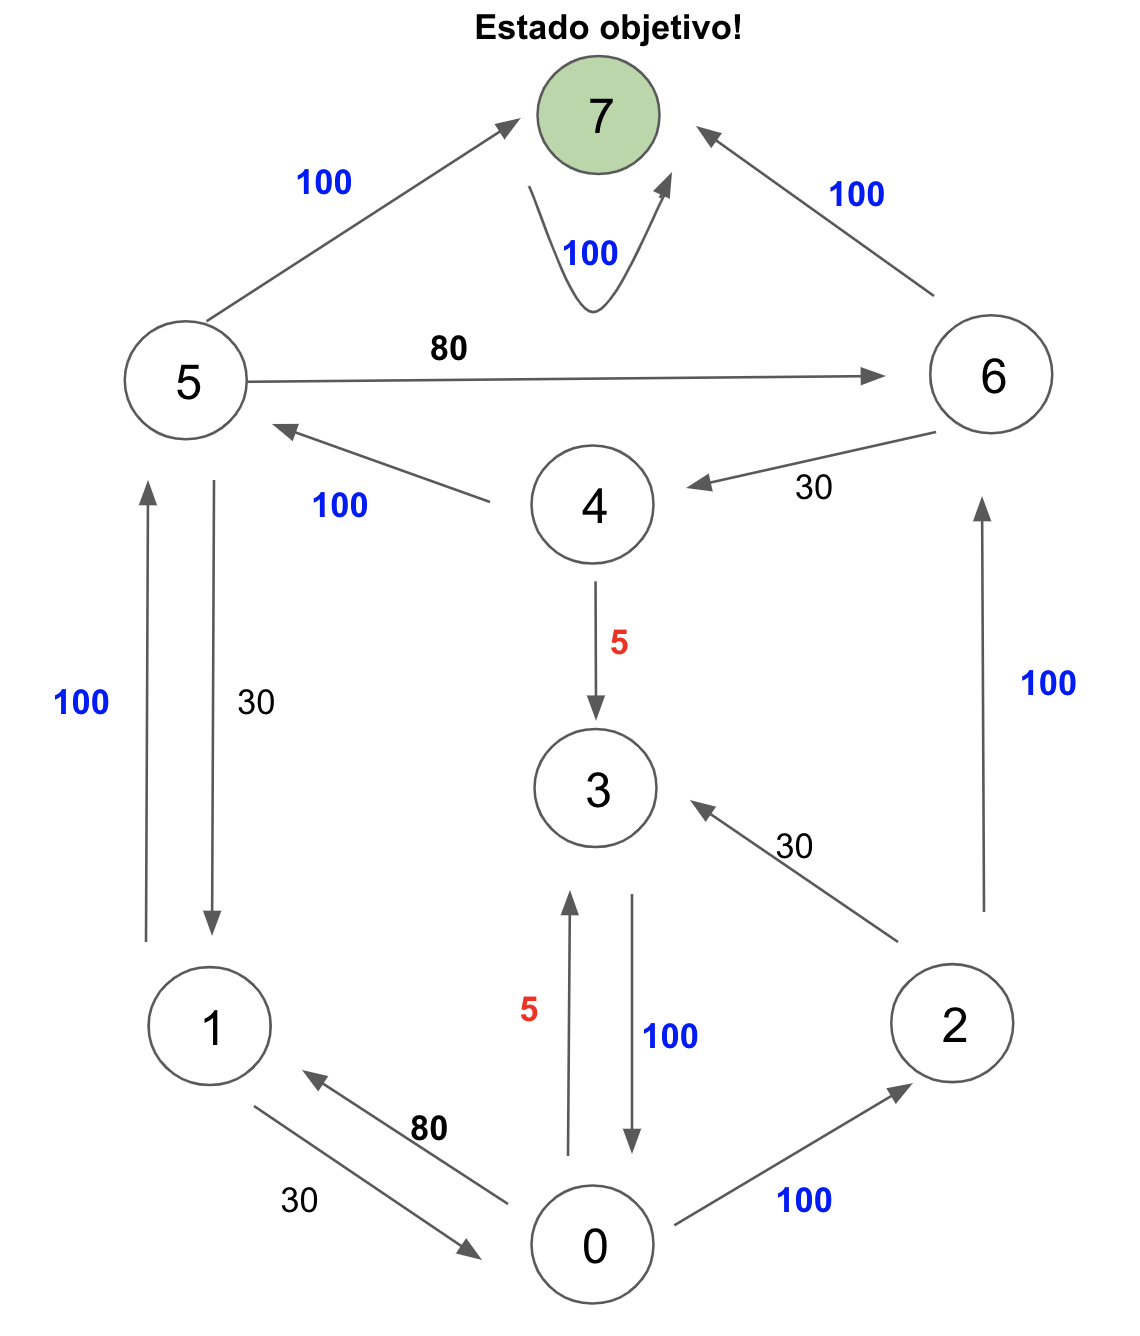
</div>

<br>

Podemos interpretar esse grafo como sendo um _labirinto_ em que o objetivo é fazer um agente aprender a sair dele no menor número de passos!

Utilize os estados/ações definidos abaixo, bem como caracterizando o estado objetivo.

Utilize a representação da matriz de recompensas a partir do grafo e aplique o algoritmo Q-Learning para que o agente aprenda a escapar.

Comece treinando o agente com poucos episódios e __vá interpretando os resultados__ a medida que a quantidade de episódios aumente. 

__Crie uma função__ que recebe dois parâmetros: a matriz Q e um estado inicial. Retorne qual é o caminho que o agente sugere, a partir desse estado inicial.

In [20]:
states = [0,1,2,3,4,5,6,7]
actions = [0,1,2,3,4,5,6,7]
goal_state = 7

In [21]:
R = [[-1,80,5,100,-1,-1,-1,-1],
     [30,-1,-1,-1,80,100,-1,-1],
     [100,-1,-1,-1,-1,-1,-1,-1],
     [-1,-1,30,-1,-1,-1,100,-1],
     [-1,-1,5,-1,-1,100,-1,-1],
     [-1,30,-1,-1,-1,-1,80,100],
     [-1,-1,-1,-1,30,-1,-1,100],
     [-1,-1,-1,-1,-1,-1,-1,100]]

R = np.array(R)
print("reward matrix: matriz de recompensas")
pd.DataFrame(R, 
             index=['state_'+str(i) for i in range(R.shape[0])],
             columns=['state_'+str(i) for i in range(R.shape[0])])

reward matrix: matriz de recompensas


,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7
state_0,-1,80,5,100,-1,-1,-1,-1
state_1,30,-1,-1,-1,80,100,-1,-1
state_2,100,-1,-1,-1,-1,-1,-1,-1
state_3,-1,-1,30,-1,-1,-1,100,-1
state_4,-1,-1,5,-1,-1,100,-1,-1
state_5,-1,30,-1,-1,-1,-1,80,100
state_6,-1,-1,-1,-1,30,-1,-1,100
state_7,-1,-1,-1,-1,-1,-1,-1,100


In [22]:
def melhor_caminho(Q, estado_inicial):
    #seu código aqui - crie uma lista L indicando qual o caminho sugerido pelo agente (representado pela matriz Q)
    return L

<br><br><br><br><br>
Fim.